<a href="https://colab.research.google.com/github/YKochura/rl-kpi/blob/main/practice/practice2/N_armed_Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N-armed Bandits


In [ ]:
sum = 0
x = [4, 5, 6, 7]
for i in range(len(x)):
    sum = sum + x[i]
    
mu = sum / len(x)
mu

5.5

In [ ]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

N = 8  # Кількість рук бандита (число ігрових автоматів)
probs = np.random.rand(N) # Приховані ймовірності, пов'язані з кожною рукою 
eps = 0.1 # епсилон для епсилон-жадібного вибору дій

In [ ]:
probs

array([0.50928346, 0.92304827, 0.97874036, 0.88043327, 0.9995455 ,
       0.30601934, 0.84096658, 0.01433233])

In [ ]:
def get_reward(prob, N=8):
    reward = 0;
    for i in range(N):
        if random.random() < prob:
            reward += 1.25
    return reward

In [ ]:
reward_test = [get_reward(0.6) for _ in range(2000)]

In [ ]:
np.mean(reward_test)

5.966875

(array([ 19.,  80., 259., 485., 537., 413., 207.]),
 array([ 0.        ,  1.42857143,  2.85714286,  4.28571429,  5.71428571,
         7.14285714,  8.57142857, 10.        ]),
 <BarContainer object of 7 artists>)

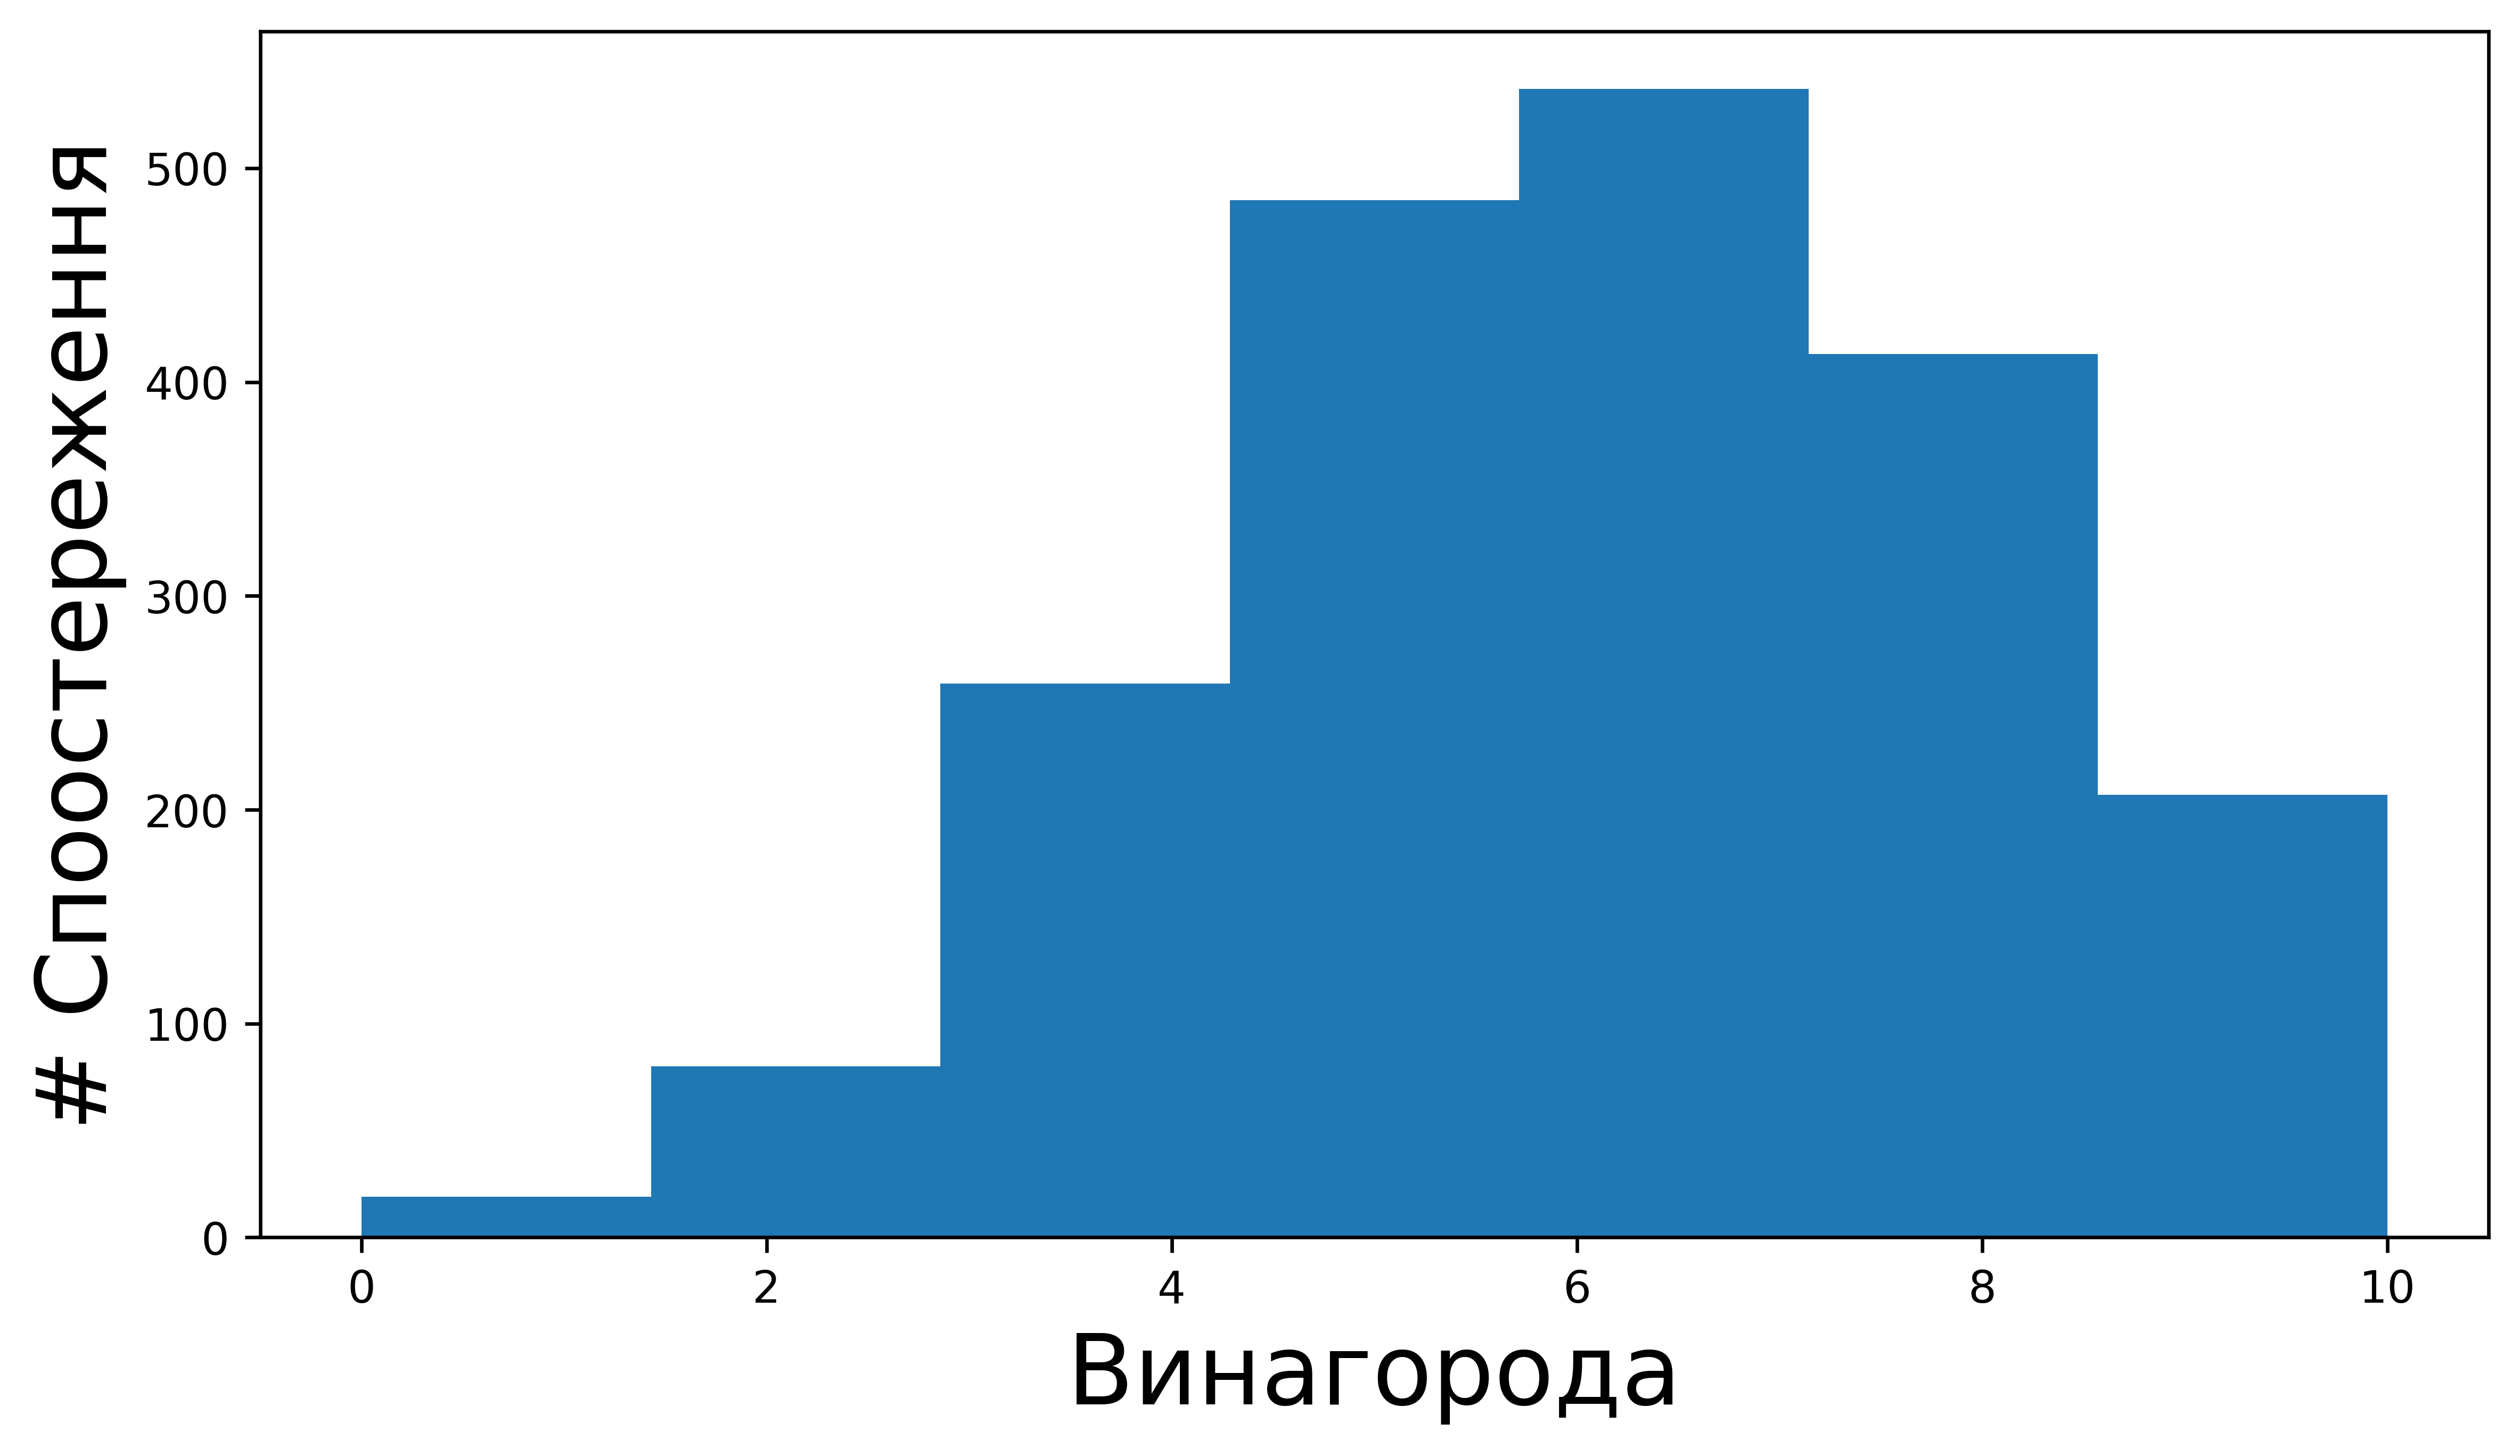

In [ ]:
plt.figure(figsize=(9,5), dpi=600)
plt.xlabel("Винагорода",fontsize=22)
plt.ylabel("# Спостереження",fontsize=22)
plt.hist(reward_test,bins=7)

##### Listing 2.4

In [ ]:
# 8 дій x 2 стовпці
# Стовпці: Кілікість зіграних ігор, Середня винагорода
record = np.zeros((N, 2))
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
def get_best_arm(record):
    arm_index = np.argmax(record[:,1], axis=0)
    return arm_index

In [ ]:
def update_record(record, action, r):
    new_r = (record[action, 0] * record[action, 1] + r) / (record[action, 0] + 1)
    record[action, 0] += 1
    record[action, 1] = new_r
    return record

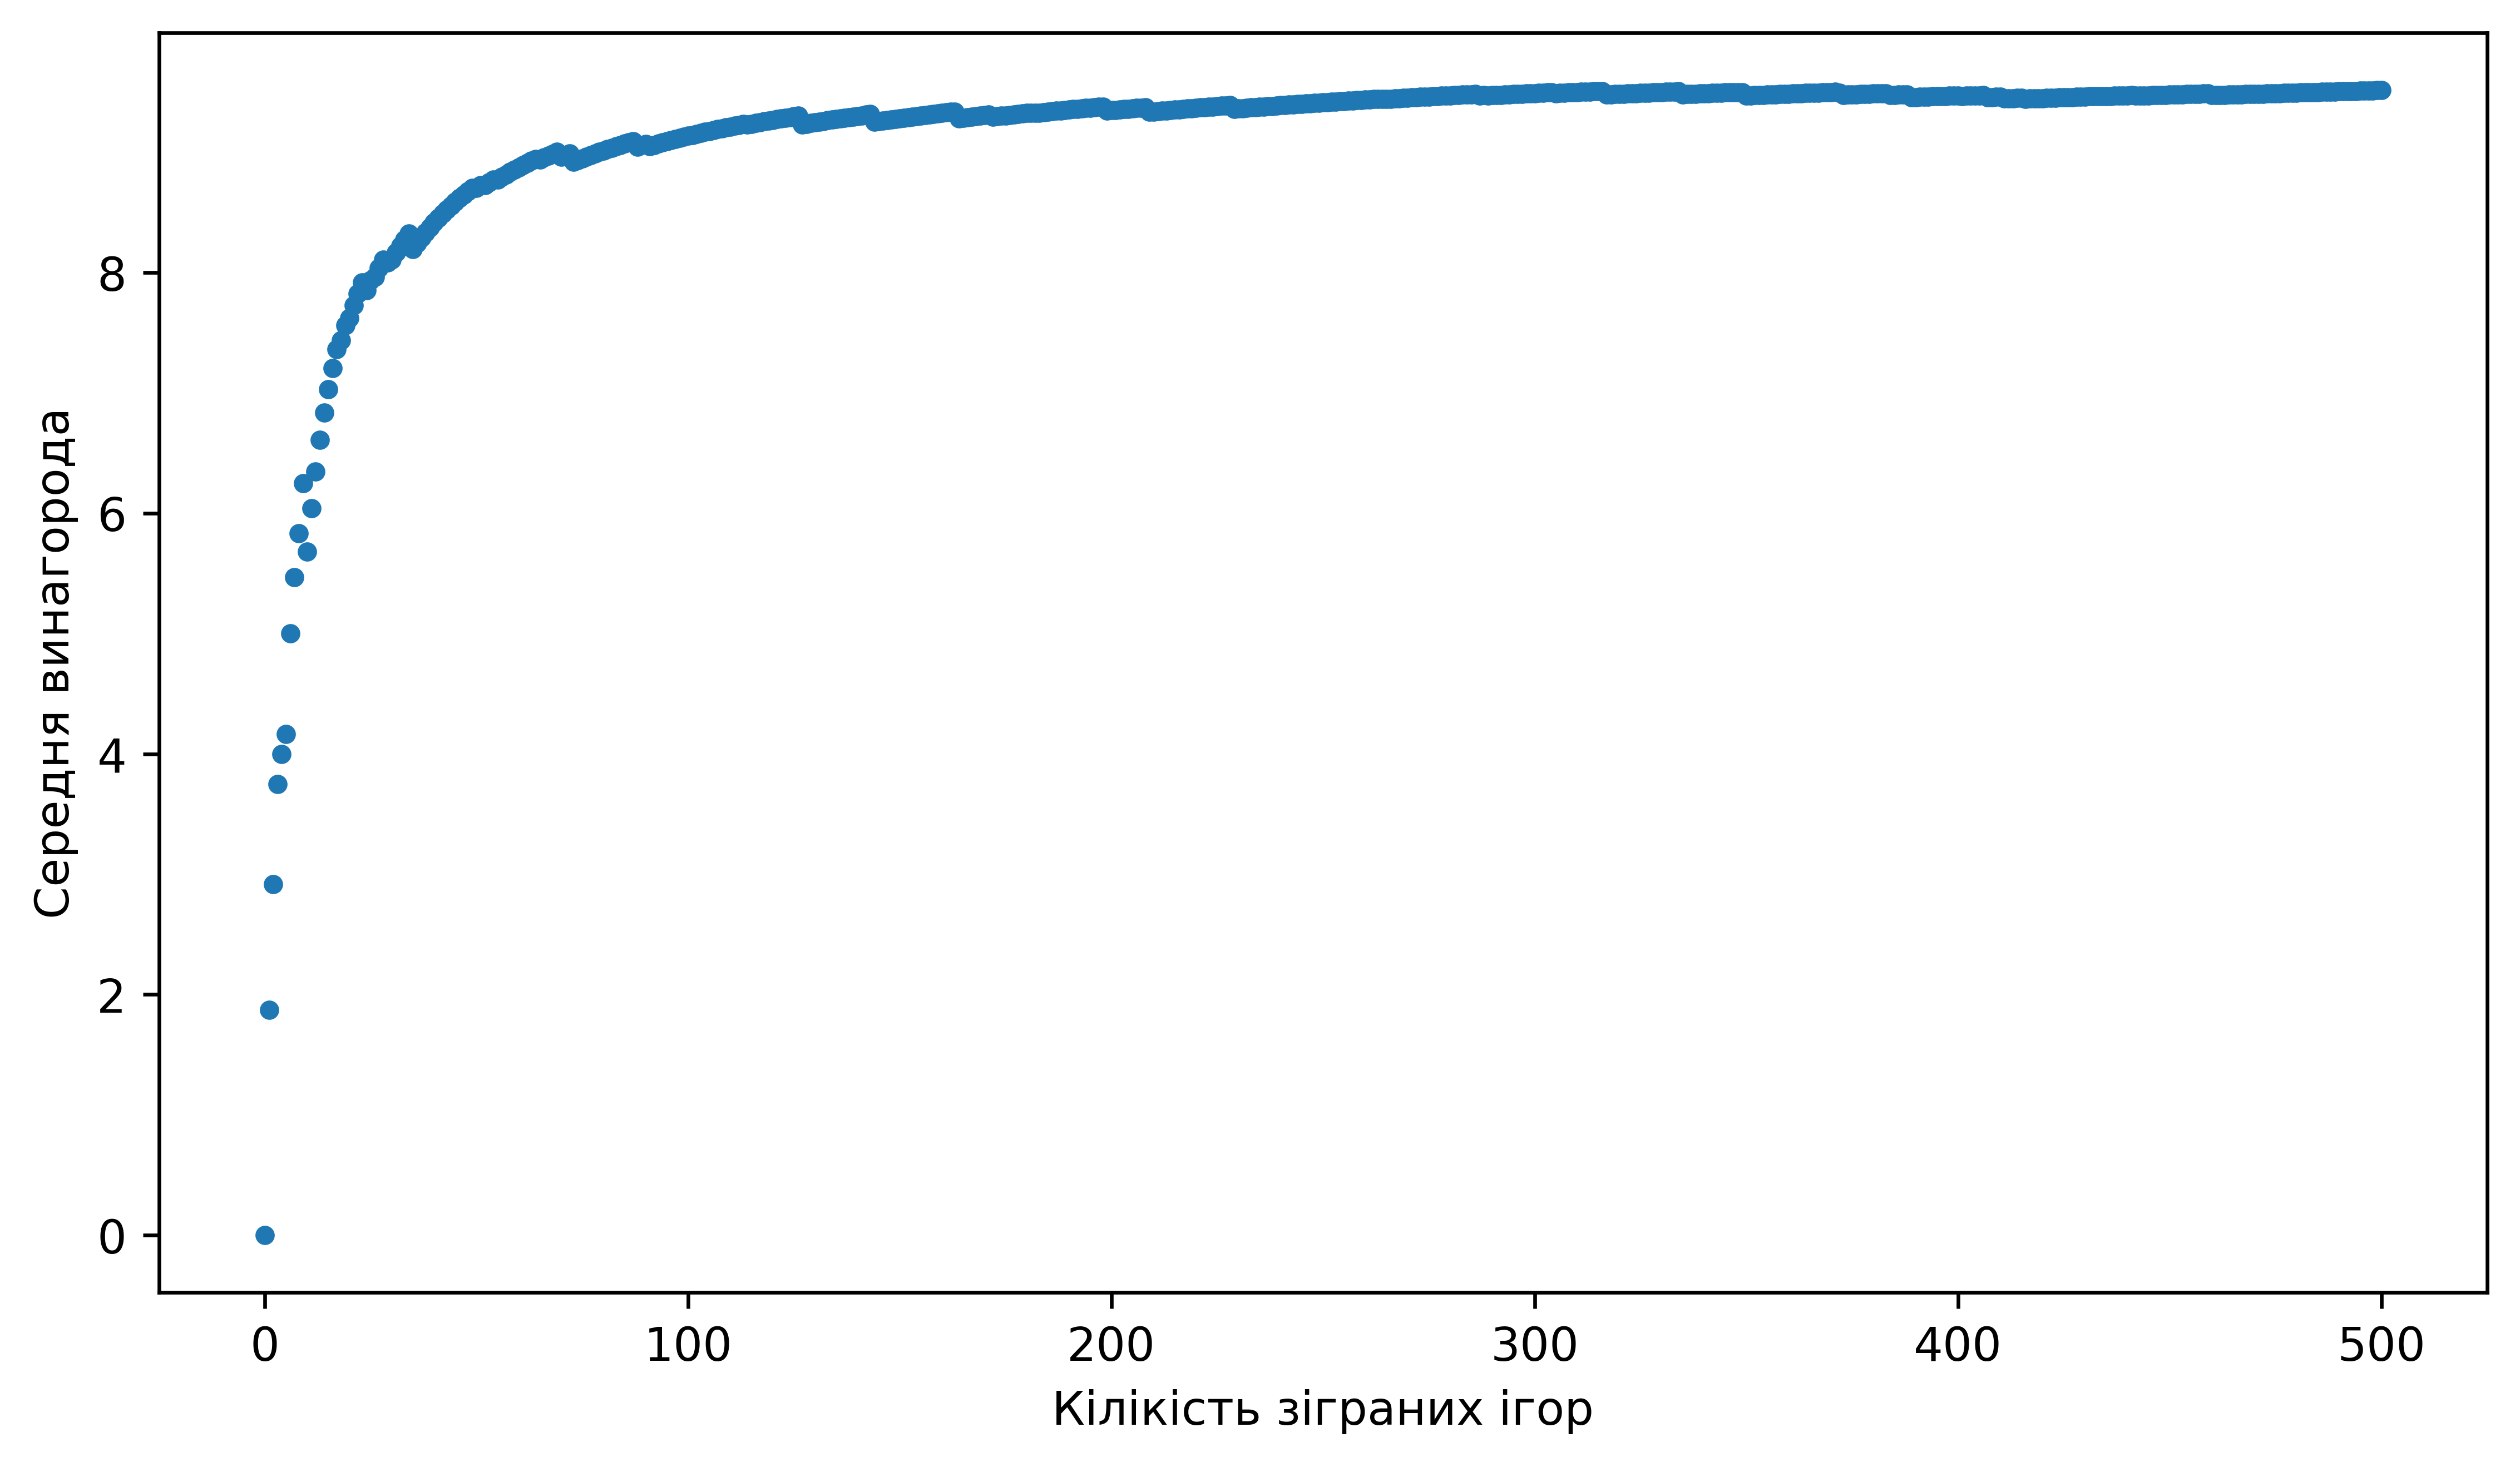

In [ ]:
fig, ax = plt.subplots(figsize=(1,1), dpi=600)
ax.set_xlabel("Кілікість зіграних ігор")
ax.set_ylabel("Середня винагорода")
fig.set_size_inches(9, 5)
rewards = [0]
for i in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(N)
    r = get_reward(probs[choice])
    record = update_record(record, choice, r)
    mean_reward = ((i + 1) * rewards[-1] + r) / (i + 2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)), rewards, s=10)

In [ ]:
record

array([[ 14.        ,   5.53571429],
       [  7.        ,   9.28571429],
       [104.        ,   9.85576923],
       [  2.        ,   8.125     ],
       [354.        ,   9.99293785],
       [ 11.        ,   3.52272727],
       [  1.        ,   6.25      ],
       [  7.        ,   0.        ]])